<a href="https://colab.research.google.com/github/DrSubbiah/1.Bayesian-Inference/blob/master/7_Bayesian_Models_Components_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="darkblue"> From Binomial Model

## Mathematical Description

**<font color="darkred"> Likelihood** $\mathcal{L}(\theta|X)$

$$X\sim \mathrm{Binomial}(n,\theta)$$ $x=0,1,\cdots n; ~~0 < \theta <1$

**<font color="darkred"> Prior** $p(\theta)$

$$\theta \sim \mathrm{Beta}(a,b)$$ $0 < \theta <1~~ a,b > 0$

**<font color="darkred"> Posterior**  $\pi(\theta|X)$

$$\theta|X \sim \mathrm{Beta}(a+x,n-x+b)$$

# <font color="darkblue"> More about Posterior Mean

$$E[\theta|x]=\frac{a+x}{n+a+b}$$  

Split the terms

$$=\frac{a}{n+a+b}+\frac{x}{n+a+b}$$  

$\times$ and $\div$ the first factor by $a+b$

$\times$ and $\div$ the second factor by $n$

$$=(\frac{n}{n+a+b})\frac{x}{n}+(\frac{a+b}{n+a+b})\frac{a}{a+b}$$


$$=(\frac{n}{n+a+b})\frac{x}{n}+(1-\frac{n}{n+a+b})\frac{a}{a+b}$$  

Rearrange the factor in the second term

$$=w_1\frac{x}{n}+w_2\frac{a}{a+b}$$  


where $0 ~\le ~w_i ~\le ~1$

**Hence, posterior mean is a <font color="darkred">weighted mean of prior mean $\frac{a}{a+b}$ and sample proportion $\frac{x}{n}$</font>**


Weights are $w_1=\frac{n}{n+a+b}$ and $w_2=1-w_1$

Weights are based on **sample (data) size and prior size $a+b$**

<font color="red">Recall average of two numbers is a weighted mean with equal weights $\frac{1}{2}x_1+\frac{1}{2}x_2=\frac{x_1+x_2}{2}$

# <font color="darkblue"> More about Prior

**<font color="darkred"> Prior** $p(\theta)$

$$\theta \sim \mathrm{Beta}(a,b)$$ $0 < \theta <1~~ a,b > 0$


## Originally, we had $a = b = 1$

- ## <font color="red">What is the rationality?

## <font color="darkviolet"> Versatility of Beta Distributions

- Range is $(0, 1)$

- Both $a, b$ are shape parameters

- Symmetric when $a = b$

- When $a>b$, $\theta$ "near $1$" is more probable

- When $a<b$, $\theta$ "near $0$" is more probable

- Mirror Images

In [ ]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns

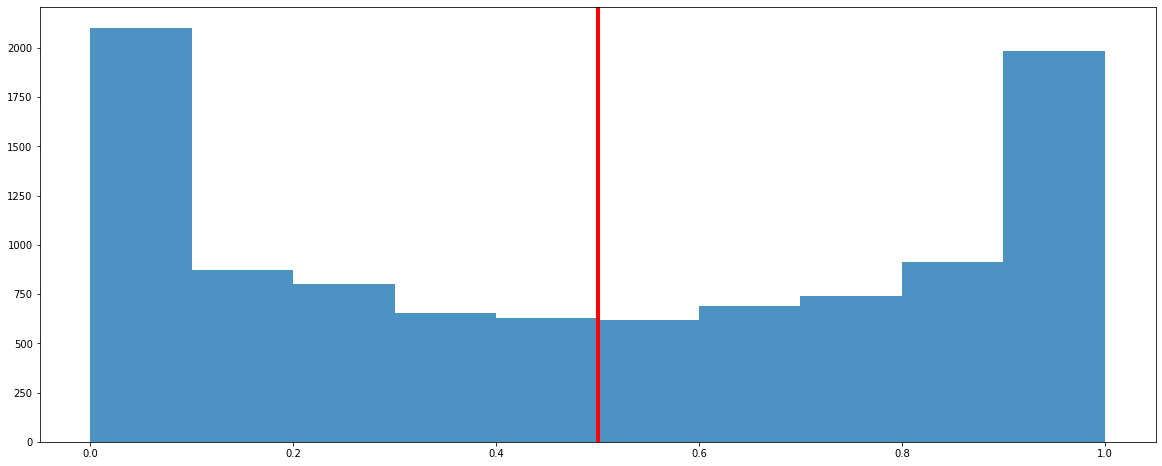

In [ ]:
k=10000
a=0.5
b=0.5
symm=0.5
rand_gen=st.beta.rvs(a,b,size=k)
fig = plt.figure(figsize = (20, 8))
plt.hist(rand_gen,alpha=0.8)
plt.axvline(x=symm, color='r',linewidth=4)
plt.show()

# <font color="darkblue"> Mirror Images

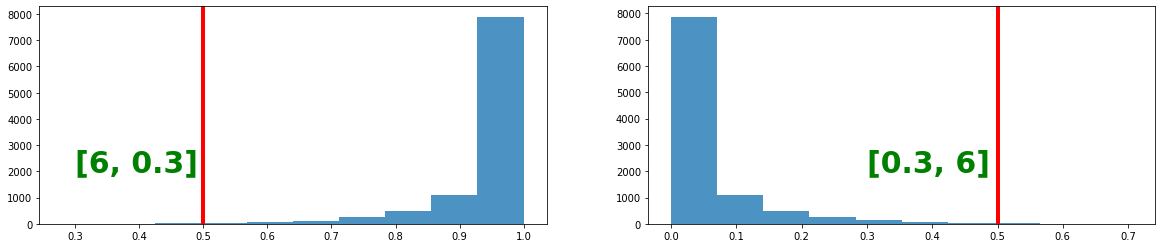

In [ ]:
k=10000
a=6
b=0.3
symm=0.5
fig = plt.figure(figsize = (20, 4))

plt.subplot(1, 2, 1)

rand_gen1=st.beta.rvs(a,b,size=k)
plt.hist(rand_gen1,alpha=0.8)
plt.axvline(x=symm, color='r',linewidth=4)
plt.text(0.3, 2000, [a,b], horizontalalignment='left', fontsize=30, color='green', weight='bold')

plt.subplot(1, 2, 2)

rand_gen2=st.beta.rvs(b,a,size=k)
plt.hist(rand_gen2,alpha=0.8)
plt.axvline(x=symm, color='r',linewidth=4)
plt.text(0.3, 2000, [b,a], horizontalalignment='left', fontsize=30, color='green', weight='bold')

plt.show()

# <font color="darkblue"> A Note on Priors

Prior distribution about a quantity of interest (parameter) is to covey the information about it before realizing the data

Hence it may be based on

1. the range of the parameter

2. Complete ignorance

3. Weakly informed

4. Subjectuvely informed

5. Mathematical convenience


## <font color="darkviolet"> Glossary of Terms

- Conjugate Priors

- Improper / Proper Priors

- Non-informative / Flat / Vague Priors

- Objective Priors

- Subjective (informative) Priors

## <font color="darkviolet"> End Notes

- Priors need to be "Constructed"

- No need to be overemphasized / overwhelmed / Dominance

- Historical / past experiences or data may be used

- Experts' opinons may be useful in constructing priors (subjected to some "protocols")

- Performing Senstivity of prior (robustness) is highlly encouraged


# <font color="darkblue"> Transformation of Parameters

In some cases we may be interested in a new parameter which is derived from the original one (exist in the model)

## <font color="darkred"> Odds

In some cases, odds would be preferred to probability because it estimates the proportion of Success to Failure

$$\mathrm{Odds} = \frac{\mathrm{Success}}{\mathrm{Failure}} =\frac{p}{1-p}$$

In fact, log odds are much more favourable for its range and approximations

$$0<p<1$$ and

$$-\infty < log(\frac{p}{1-p})<\infty$$

# <font color="darkblue"> Sequential Update

Bayesian model allows to update the information about $\theta$ from "start somewhere or nowhere" and proceed once data is realized in each stage

## <font color="darkred"> Scheme - Symbolical Note

With usual symbols / notations

$$p_0(\theta) \rightarrow \pi_1(\theta|X) = p_1(\theta)\rightarrow \pi_2(\theta|X)=p_2(\theta) \rightarrow \pi_3(\theta|X)\cdots\cdots$$


$p_0(\theta)$ is before "see" the data

At each iteration of this sequence, information about $\theta$ is updated once data and additional date are made available

# <font color="darkblue"> Predictive Distribution

Bayesian model allows to obtain distribution about unseen data in the light of information contained in the posterior of the parameter $\theta$ exist in the original likelihood


## <font color="darkred"> Predictive information about "New Data"

- Observe a data $X$ parameterised by $\theta$

- Construct prior for $\theta$

- Obtain posterior $\theta|X$

- **Interested to know the probability distribution about "unseen data $Y$"**

$$p(Y|X) = \int_{\theta}p(Y|\theta)\pi(\theta|X)~d\theta$$

- $p$ refers to the pdf of $Y$ parameterised by $\theta$ (same as $X$)

- $\pi$ refers to Posterior of $\theta$

<font color="red">**Obsessive?**

$$p(Y|X)=\int_{\theta}p(y|x,\theta)p(\theta|x)~d\theta$$

$$=\int_{\theta}p(y|\theta)\frac{p(x,\theta)}{p(x)}d\theta$$

$$=\int_{\theta}p(y|\theta)\pi(\theta|X) ~d\theta$$


$$\therefore p(Y|X)=\int_{\theta}p(y|\theta)\pi(\theta|x)~d\theta$$

<font color="red">**Still Obsessive?**

## <font color="darkviolet"> For Binomial Case

1. Originally the data was a Binomial with $x$ and $n$

1. The Prior was Beta with parameters $a$ and $b$

1. The Posterior was Beta with parameters $x+a$ and $n-x+b$

Hence Posterior predictive for an unseen environment is out of a new trial, say $m$ number times, what is the distribution of then number of successes $y$

So again the likelihood $\mathcal{L}[\theta|Y]$ or PMF $f(Y|\theta)$ is from

$$Y|\theta = \mathrm{Binomial}(m, \theta)$$

## <font color="red"> But information for $\theta$ is no longer Step 2 but Step 3 of above

$$\therefore p(Y|X)=\int_{\theta}p(y|\theta)\pi(\theta|x)~d\theta$$ leads to


$$\therefore p(Y|X)=\int_0^1{m \choose y} \theta^y (1-\theta)^{m-y} \frac{1}{\beta(a_1,a_2)}\theta^{a_1-1} (1-\theta)^{a_2-1} ~d\theta$$

where $a_1=x+a$ and $a_2=n-x+b$

$$\implies p(Y|X)=\frac{{m \choose y}}{\beta(a_1,a_2)}\int_0^1 \theta^{y+a_1-1} (1-\theta)^{m-y+a_2-1} ~d\theta$$

$$\implies p(Y=y|x=x)=\frac{{m \choose y}}{\beta(a_1,a_2)}\beta(y+a_1, m-y+a_2)$$

where the range for $m$ is $y=0,1,2,\cdots\cdots,m$

## <font color="maroon">**This is called Beta-Binomial Distribution**

# A causal Reading

[Casey Problem](http://stats.org.uk/priors/informative/WinklerSmithFryback2002.pdf)